### Boosting Algorithm
- Boosting : 여러개의 (약한) 분류기가 순차적으로 학습을 하면서, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해 다음 분류기가 가중치를 인가해서 학습은 진행하는 방식
- Bagging과 Boosting의 차이 
    - Bagging : 한 번에 병렬적으로 결과를 얻음
    - Boosting : 순차적으로 진행됌
    
- Boosting 기법의 종류
    - GBM Gradient Boosting Machine : AdaBoost 기법과 비슷하지만, 가중치를 업데이트 할 때 경사하강법(Gradient Descent)을 사용
    - XGBoost : GBM에서 PC의 파워를 효율적으로 사용하기 위한 다양한 기법에 채택되어 빠른 속도와 효율을 가짐
    - LightGBM : XGBoost 보다 빠른 속도를 가짐. 3가지의 Boosting 기법들 중 가장 강력하지만 과최적화의 문제로 인해 데이터의 개수가 많을 때 사용해야한다.
- 3가지 종류의 boosting 기법들은 알고리즘적인 갱신으로 인하여 속도가 다른 것이 아니라, 하드웨어측면에서의 갱신으로 인하여 속도가 다르다.

### wine 데이터 분석

In [1]:
wine_url="https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv"
wine=pd.read_csv(wine_url,index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [18]:
wine['taste']=[1. if grade>5 else 0 for grade in wine['quality']]
X=wine.drop(['taste','quality'],axis=1)
y=wine['taste']

In [19]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_sc=sc.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2, random_state=27)


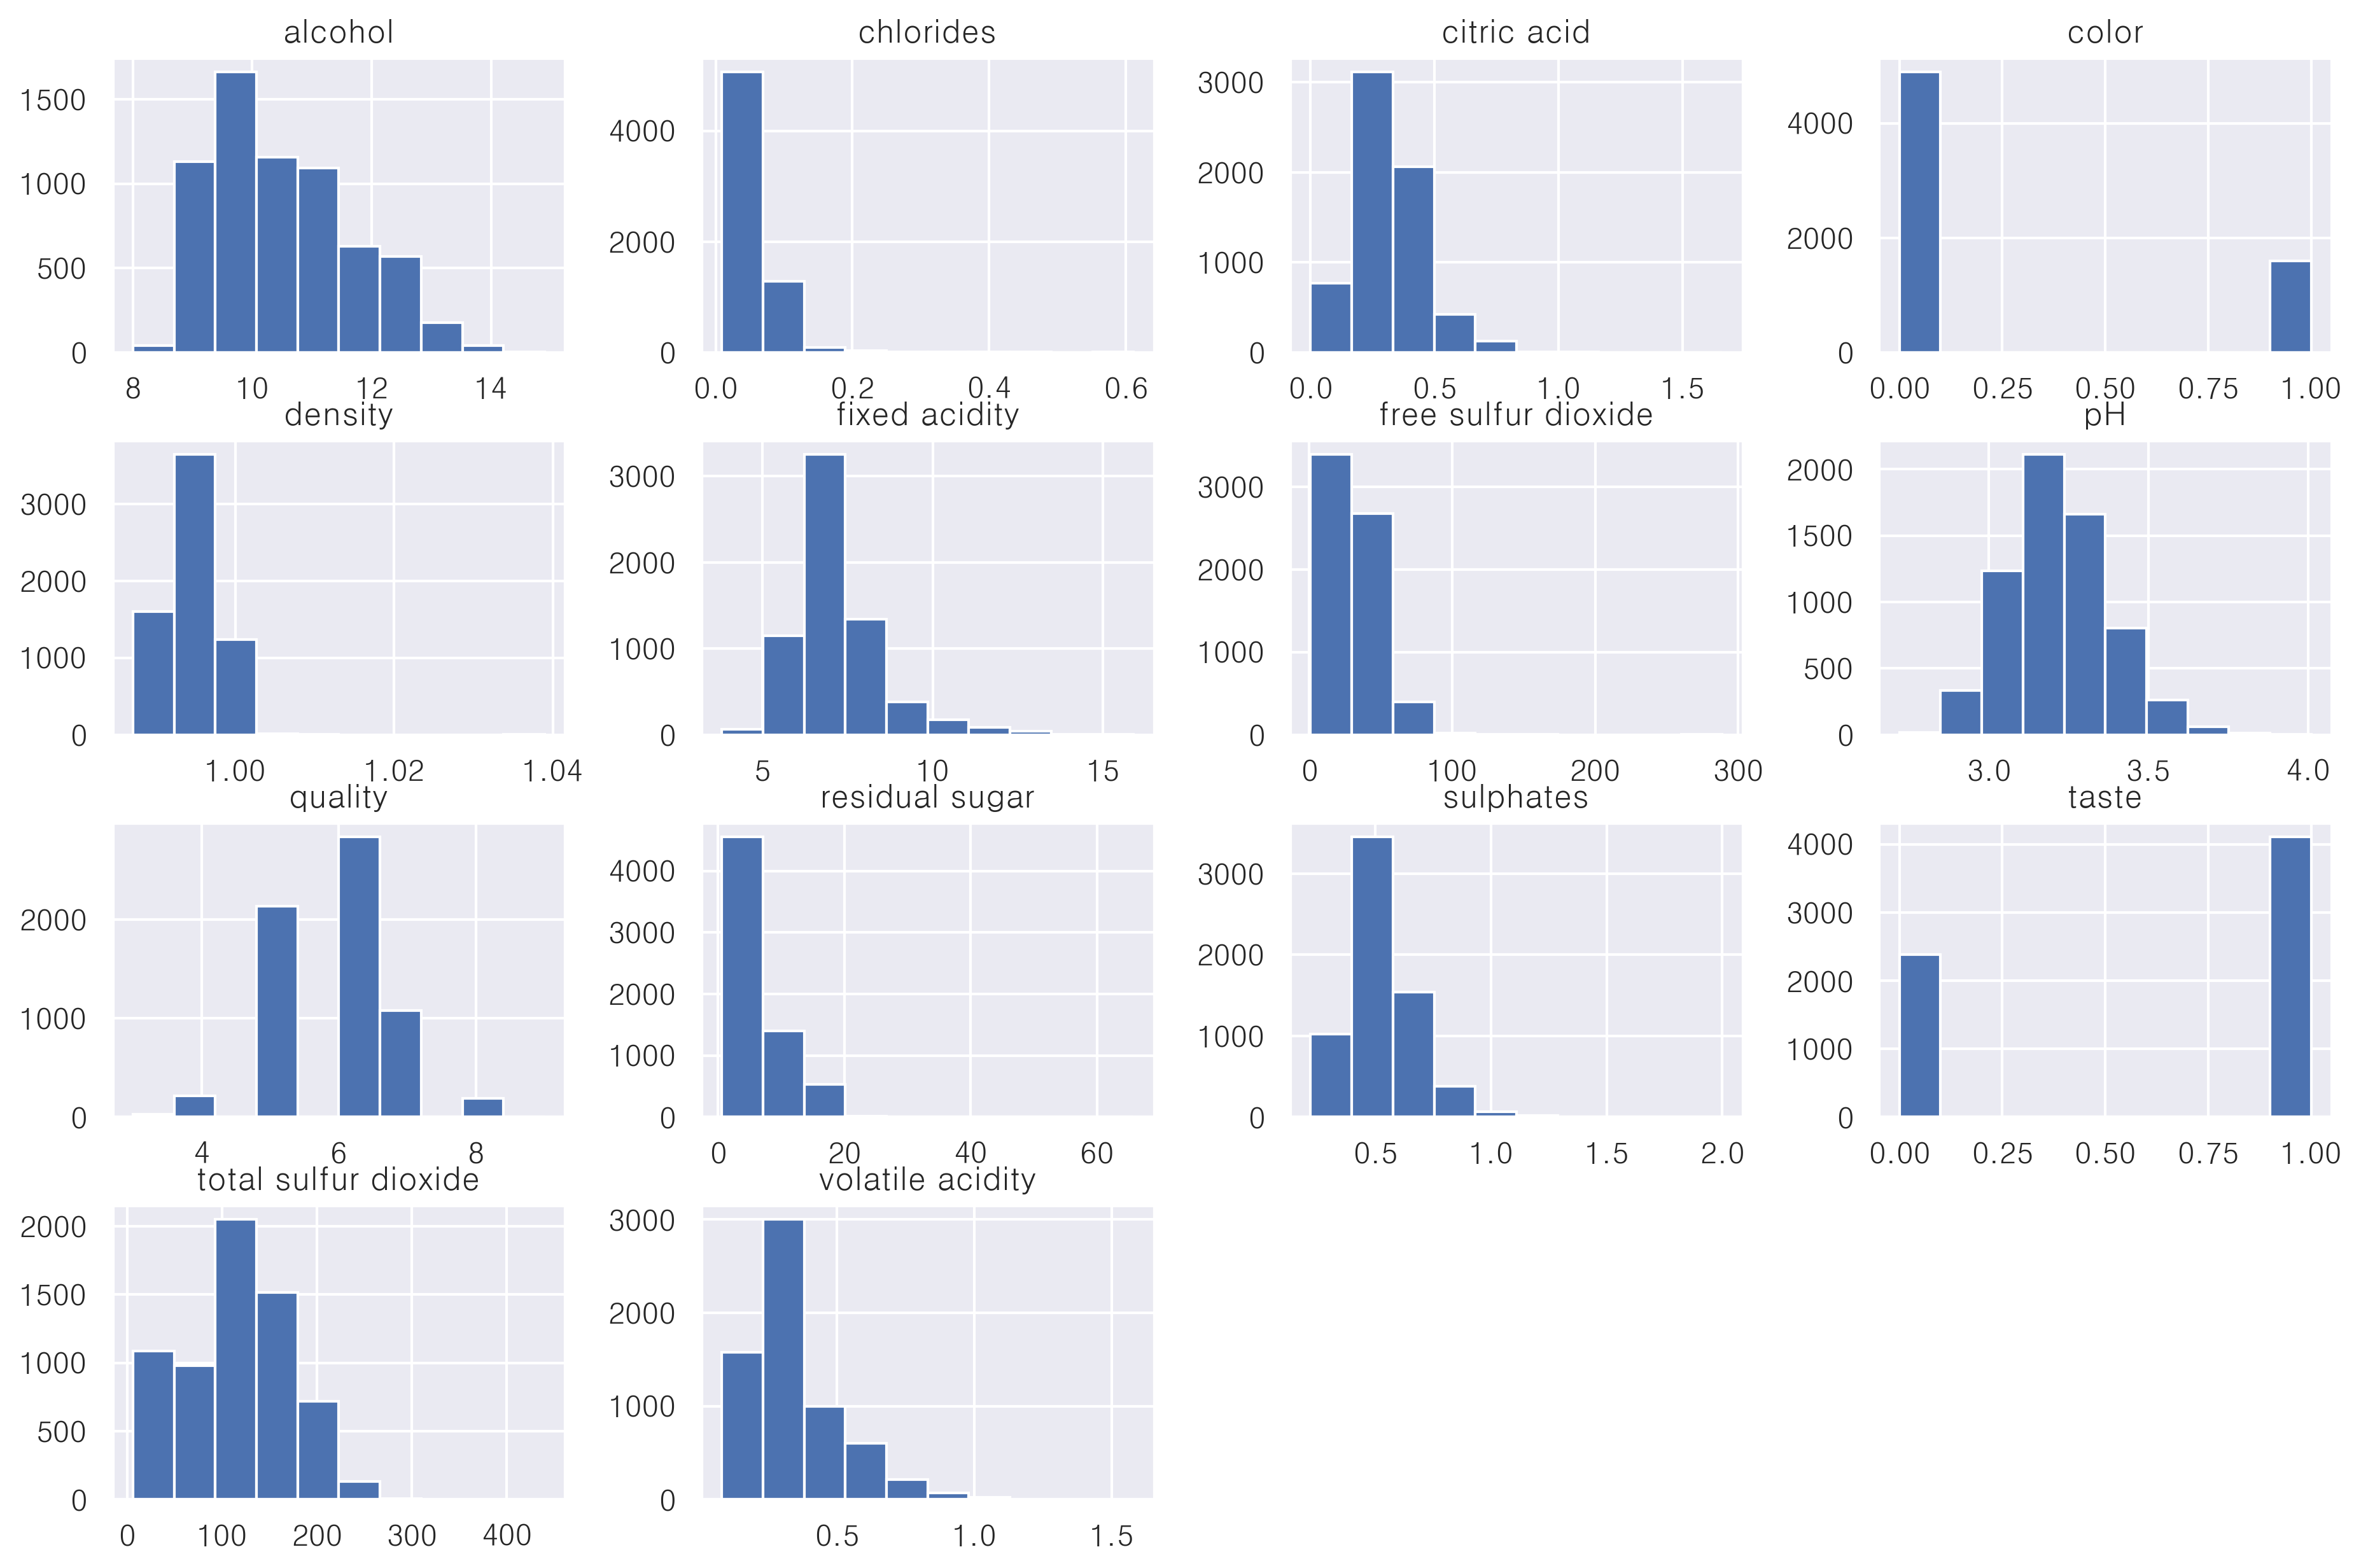

In [21]:
#모든 컬럼의 히스토그램 조사
#잘 분포되어 있는 컬럼이 좋을 때가 많다
wine.hist(bins=10,figsize=(15,10))
plt.show()

In [22]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'taste'],
      dtype='object')

In [23]:
#quality 별 다른 특성을 확인 해보자.
column_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color']
df_pivot_table=wine.pivot_table(column_names,['quality'],aggfunc='median')
print(df_pivot_table)

         alcohol  chlorides  citric acid  color   density  fixed acidity  \
quality                                                                    
3          10.15     0.0550         0.33      0  0.995900           7.45   
4          10.00     0.0505         0.26      0  0.994995           7.00   
5           9.60     0.0530         0.30      0  0.996100           7.10   
6          10.50     0.0460         0.31      0  0.994700           6.90   
7          11.40     0.0390         0.32      0  0.992400           6.90   
8          12.00     0.0370         0.32      0  0.991890           6.80   
9          12.50     0.0310         0.36      0  0.990300           7.10   

         free sulfur dioxide     pH  residual sugar  sulphates  \
quality                                                          
3                       17.0  3.245            3.15      0.505   
4                       15.0  3.220            2.20      0.485   
5                       27.0  3.190            3.00

In [25]:
#quality 에 대한 나머지 특정들의 상관관계는?
corr_matrix=wine.corr()
print(corr_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


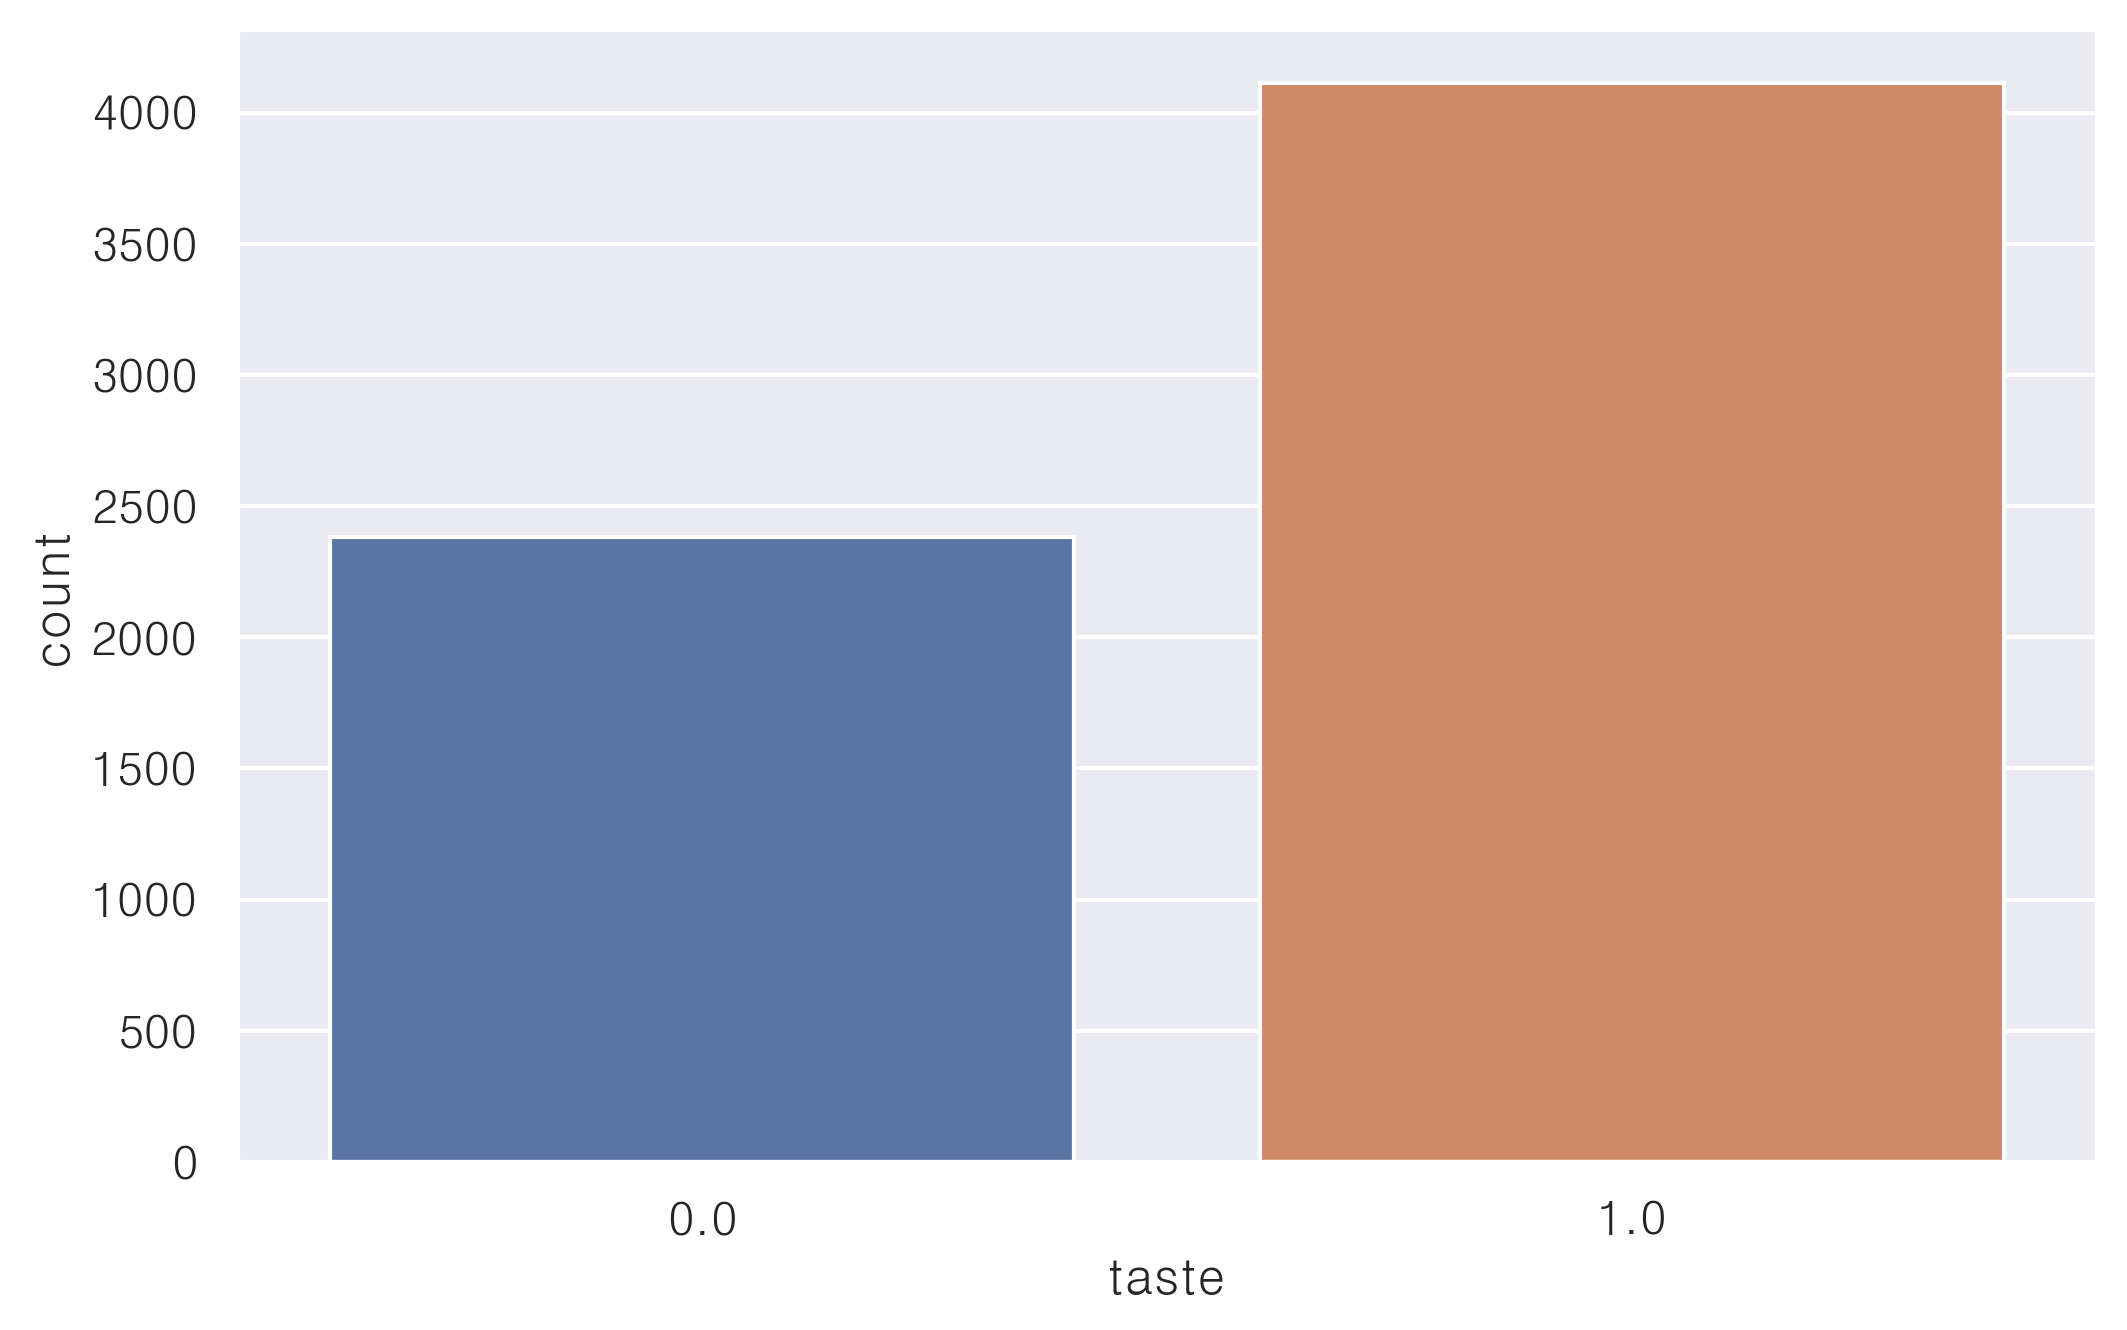

In [28]:
#taste 컬럼의 분포는?
sns.countplot(wine['taste'])
plt.show()

In [33]:
#다양한 모델을 한번에 테스트하기
from sklearn.ensemble import(AdaBoostClassifier, GradientBoostingClassifier,\
                            RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models=[]
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

In [34]:
#결과를 저장하기 위한 작업
from sklearn.model_selection import KFold,cross_val_score

results=[]
names=[]

for name,model in models:
    kfold=KFold(n_splits=5, random_state=27, shuffle=True)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    print(name,cv_results.mean(),cv_results.std())

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RandomForestClassifier 0.8041178648108389 0.006479618929418422
DecisionTreeClassifier 0.7687127045235804 0.005149814124166685
AdaBoostClassifier 0.7546666543273859 0.008480277650472169
GradientBoostingClassifier 0.7740993558895388 0.007444890776101652
LogisticRegression 0.7440838083956468 0.009403273994867227


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

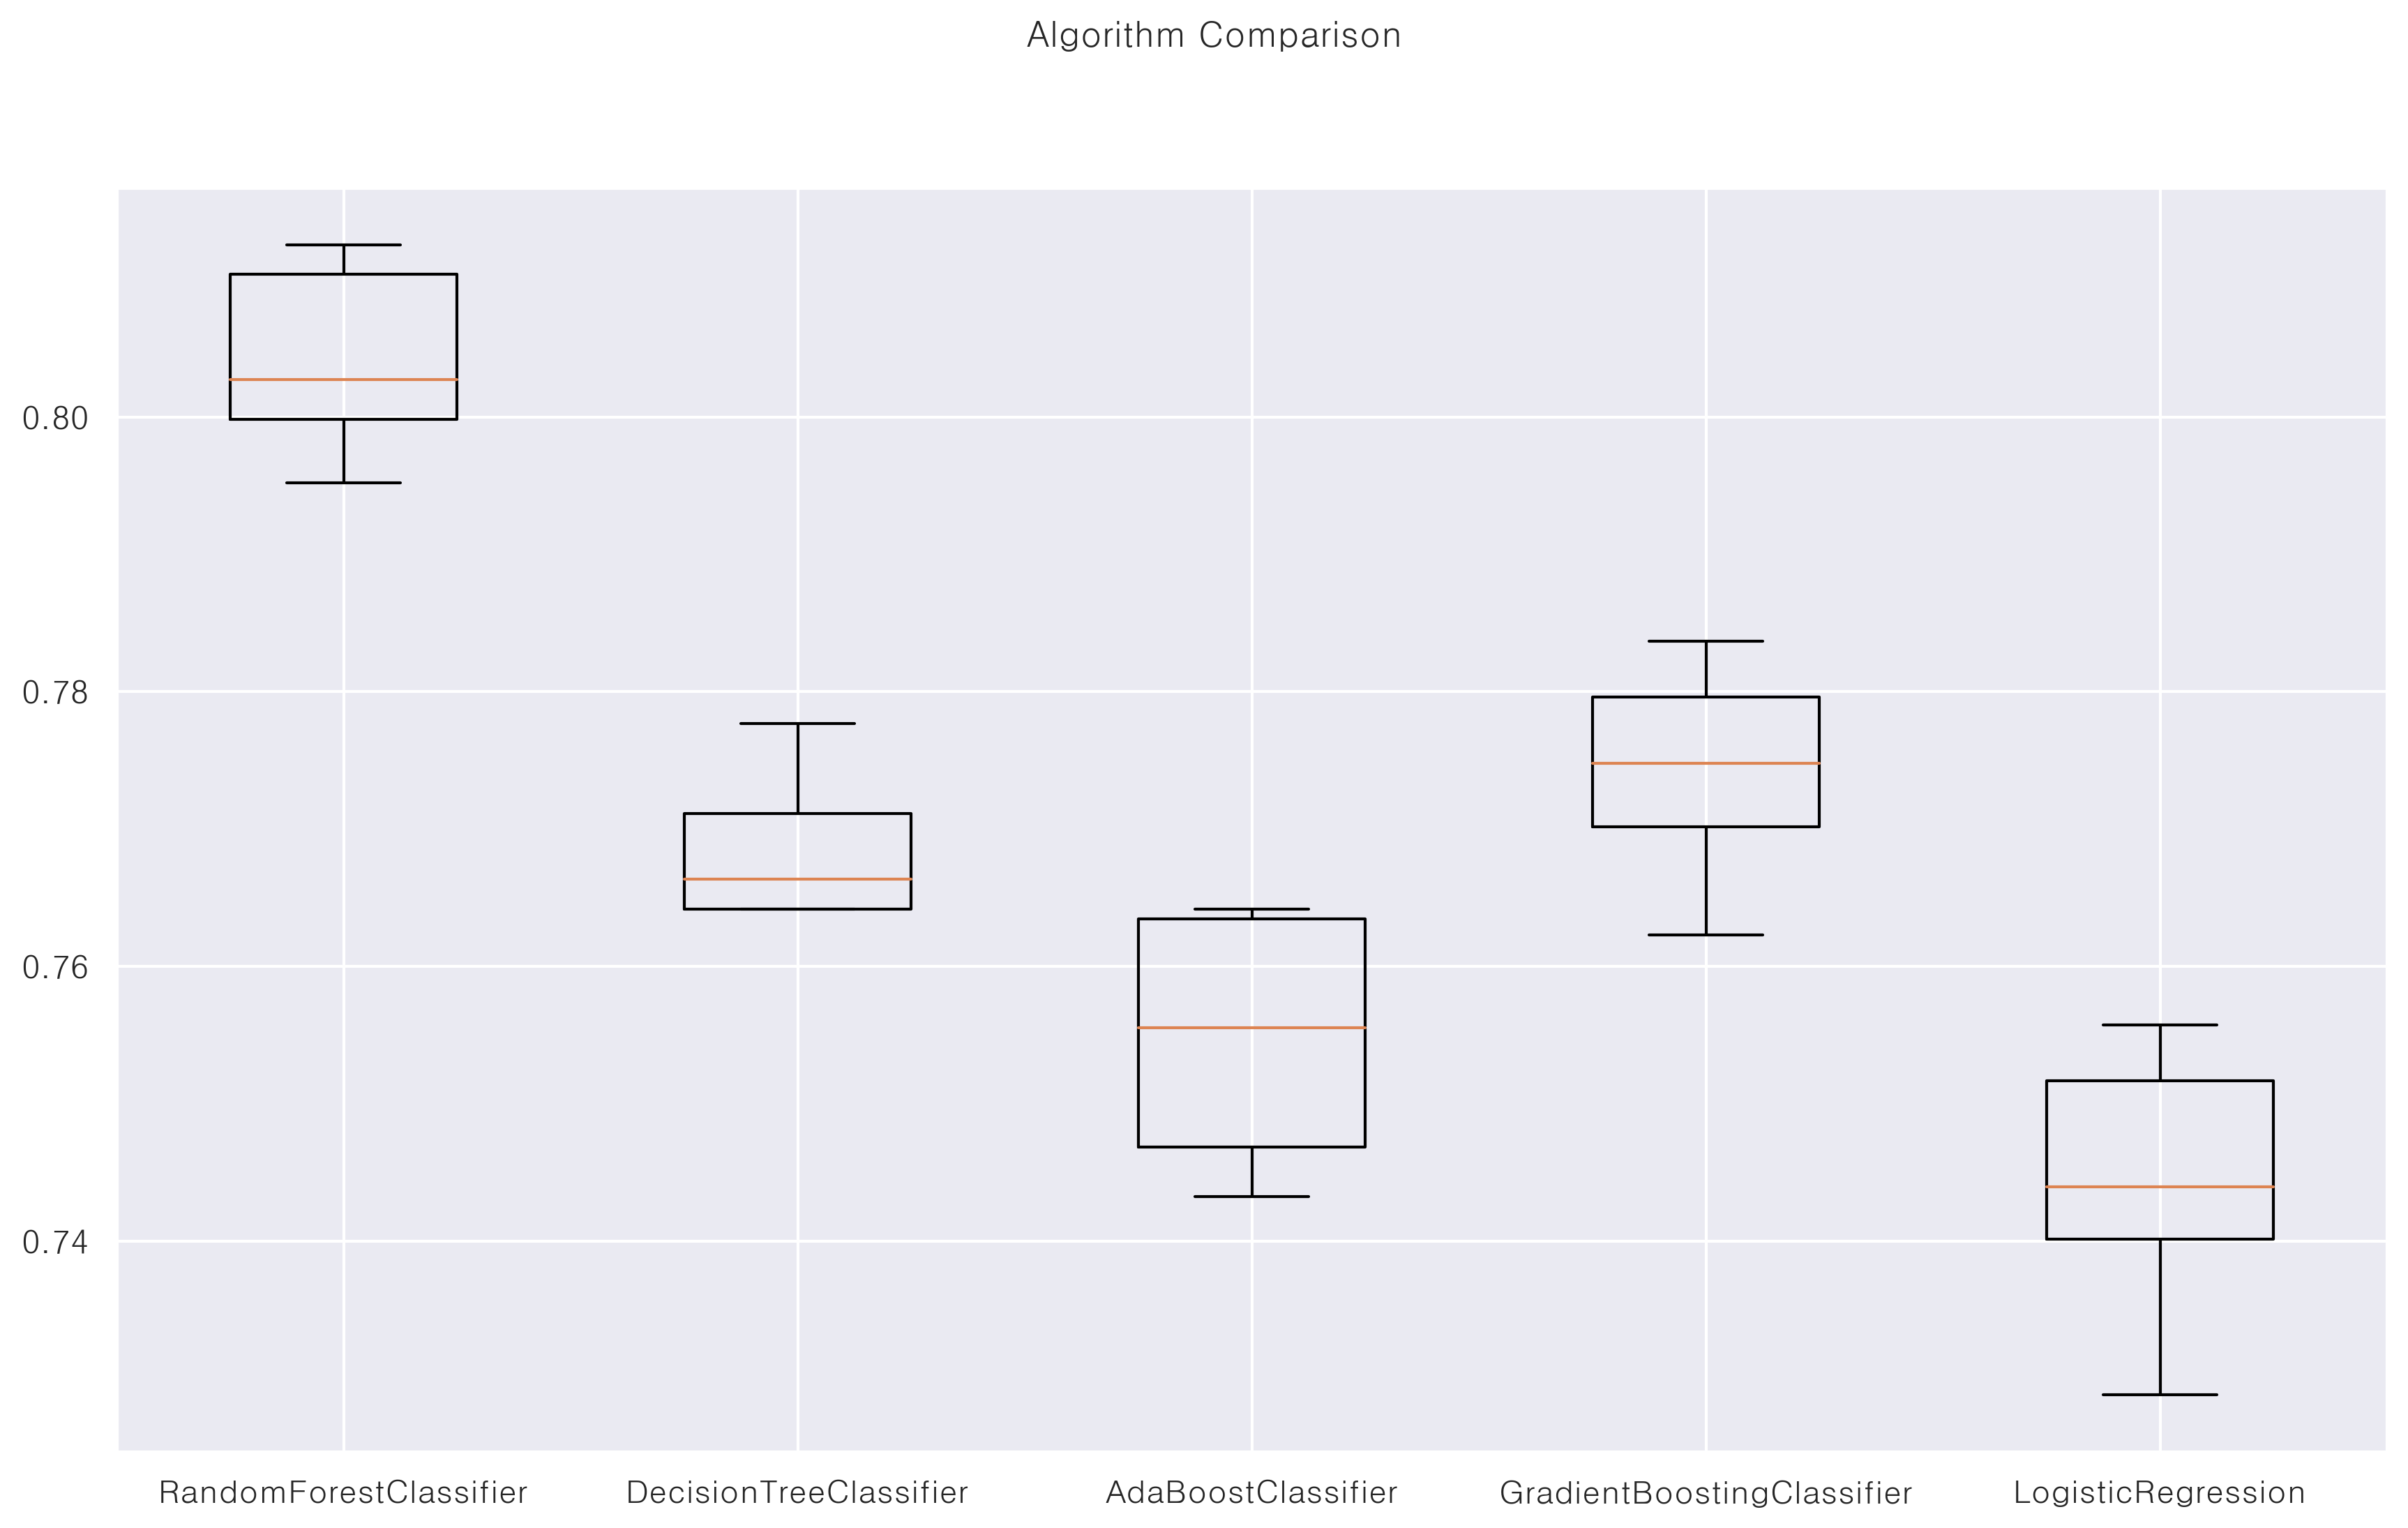

In [35]:
#Cross-validation 결과를 일목요연하게 확인하기
fig=plt.figure(figsize=(14,8))
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [39]:
#테스트 데이터에 대한 평가 결과
from sklearn.metrics import accuracy_score

for name,model in models:
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print(name,accuracy_score(y_test,pred))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier 0.806923076923077
DecisionTreeClassifier 0.7746153846153846
AdaBoostClassifier 0.7492307692307693
GradientBoostingClassifier 0.7630769230769231
LogisticRegression 0.7276923076923076


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
